# Week 8 Homework Assignment

So far Sim and I have mostly looked at parks, tenure, and housing prices separately. After talking to Yoh, we thought it would be a great idea to create an index. 

One index is Quality of Life, where a census tract with a 'high quality of life' would have a high number of parks per population, an high increase in percent change in renters, and small increase percent change in housing prices. 

Another index is a Displacement Index, where a census tract that is vulnerable to displacement from parks would have a high number of parks, a high decrease in percent change in renters, and high increase in percent change in housing prices. 

First to do either of these idices, we need transform our current dataframes to have a 'score' on each subject.

To do this, we've decided to use four quantiles (25%, 50%, 75%, 100%) to represent a scoring matrix. We'll need to calculate the four quantiles for parks per 1,000 people, percent change in renters (2010-2019), and percent change in housing prices (2010-2019). 

We'll then assing a 'score' to each quantile as follows

**For Displacement Index:**
Parks per thousand people: 
* 25% = 1; lowest amount of parks per 1000 people
* 50% = 2
* 75% = 3
* 100% = 4; highest amount of parks per 1000 people

Percent Change in Renters
* 25% = 4;lowest increase in renters (highest decrease in renters - because percent change in renters has negative numbers)
* 50% = 3
* 75% = 2
* 100% = 1; highest increase in renters

Percent Change in Housing Prices 
* 25% = 1; lowest increase in housing prices
* 50% = 2
* 75% = 3
* 100% = 4; highest increase in housing prices

You then add the three matrix together to create the Displacment Index.

So with this index, a high score means that there are a lot of parks per 1000 people, but housing prices increased dramatically and renters left the census tract. This can be an indicator that displacment was occuring and determine if there may be a relationship to parks. 

An opposing index is the **Quality of Life Index:** 
Parks per thousand people: 
* 25% = 1; lowest amount of parks per 1000 people
* 50% = 2
* 75% = 3
* 100% = 4; highest amount of parks per 1000 people

Percent Change in Renters
* 25% = 1;lowest increase in renters (highest decrease in renters - because percent change in renters has negative numbers)
* 50% = 2
* 75% = 3
* 100% = 4; highest increase in renters

Percent Change in Housing Prices 
* 25% = 4; lowest increase in housing prices
* 50% = 3
* 75% = 2
* 100% = 1; highest increase in housing prices

So with this index, a high score means that there are a lot of parks per 1000 people, housing prices did not increase dramatically from 2010-2019, and there were an increase of renters. 


## First, lets import our data and clean it up. 

All these steps have been done before in previous labs. 

In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

In [2]:
tenure = gpd.read_file('acs2019_5yr_B25003_14000US06037222001.geojson')

In [3]:
tenurechange = gpd.read_file('TenurePercentChange_LACounty.csv')

In [4]:
tenure = tenure.drop([0])

In [5]:
columns_to_keep = ['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003', 
 'geometry'] 
tenure = tenure [columns_to_keep]

In [6]:
tenurechange.rename(columns = {'Geo_GEOID':'geoid'}, inplace = True)

In [7]:
tenure = tenure.merge(tenurechange,on='geoid')

In [8]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   geoid                        1004 non-null   object  
 1   name                         1004 non-null   object  
 2   B25003001                    1004 non-null   float64 
 3   B25003002                    1004 non-null   float64 
 4   B25003003                    1004 non-null   float64 
 5   geometry_x                   1004 non-null   geometry
 6   Geo_FIPS                     1004 non-null   object  
 7   Geo_NAME                     1004 non-null   object  
 8   Geo_QName                    1004 non-null   object  
 9   Geo_STUSAB                   1004 non-null   object  
 10  Geo_TRACT                    1004 non-null   object  
 11  2019_Occupied Housing Units  1004 non-null   object  
 12  2019_Owners                  1004 non-null   object  
 13  201

In [9]:
tenure.rename(columns = {'geometry_x':'geometry'}, inplace = True)

In [10]:
from geopandas import GeoDataFrame
tenure = GeoDataFrame(tenure)

In [11]:
tenure['PC_OccupiedHousingUnits'] = tenure['PC_OccupiedHousingUnits'].astype(float)
tenure['PC_Owners'] = tenure['PC_Owners'].astype(float)
tenure['PC_Renters'] = tenure['PC_Renters'].astype(float)

In [12]:
parks = gpd.read_file('SoCalParks.zip')
parks.to_file('SoCalParks.geojson', driver='GeoJSON')

In [13]:
parks['Park_Name'] = parks ['Park_Name'].astype(str)
parks['Park_Urban'] = parks ['Park_Urban'].astype(str)
parks['Park_Desig'] = parks ['Park_Desig'].astype(str)
parks['Park_Owner'] = parks ['Park_Owner'].astype(str)
parks['Park_Local'] = parks ['Park_Local'].astype(str)
parks['Park_Manag'] = parks ['Park_Manag'].astype(str)
parks['Park_Loc_1'] = parks ['Park_Loc_1'].astype(str)
parks['Park_Statu'] = parks ['Park_Statu'].astype(str)
parks['Park_Est_D'] = parks ['Park_Est_D'].astype(str)
parks['Park_Addre'] = parks ['Park_Addre'].astype(str)
parks['Park_State'] = parks ['Park_State'].astype(str)
parks['Park_Sta_1'] = parks ['Park_Sta_1'].astype(str)
parks['Park_Count'] = parks ['Park_Count'].astype(str)   
parks['Park_Cou_1'] = parks ['Park_Cou_1'].astype(str)     
parks['Park_Place'] = parks ['Park_Place'].astype(str)
parks['Park_Pla_1'] = parks ['Park_Pla_1'].astype(str)   
parks['Park_Urb_1'] = parks ['Park_Urb_1'].astype(str)     
parks['Park_Zip'] = parks ['Park_Zip'].astype(str)
parks['Park_Bound'] = parks ['Park_Bound'].astype(str)   
parks['Park_Sourc'] = parks ['Park_Sourc'].astype(str)     
parks['Park_Feedb'] = parks ['Park_Feedb'].astype(str)
parks['Park_DateA'] = parks ['Park_DateA'].astype(str) 
parks['DataShare_'] = parks ['DataShare_'].astype(str)

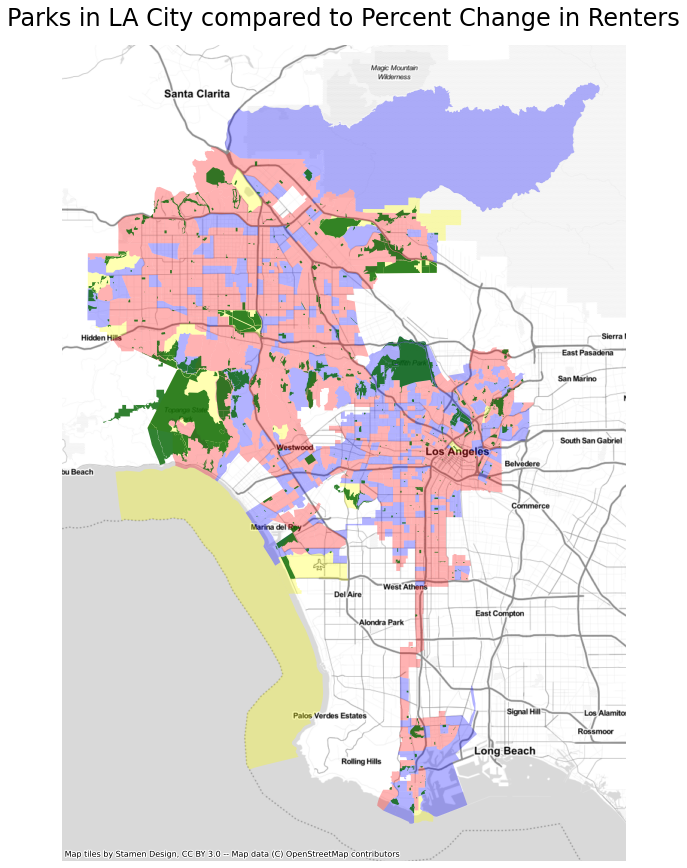

In [30]:
parks_web_mercator = parks.to_crs(epsg=3857) 
tenure_web_mercator = tenure.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 


tenure_web_mercator[tenure_web_mercator['PC_Renters'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] == 0].plot(                                      
                                                               ax=ax,
                                                               color="yellow",
                                                               alpha=0.3
)

parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha= 0.8 
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City compared to Percent Change in Renters',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

I still need to do a spatail join of the parks data to the tenure data to get information on park counts at the census tract level. 

In [15]:
tenure = tenure.to_crs(epsg=3857)
parks = parks.to_crs(epsg=3857)

In [51]:
join = gpd.sjoin(tenure,parks, how='left')

In [52]:
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1365 entries, 0 to 1003
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   geoid                        1365 non-null   object  
 1   name                         1365 non-null   object  
 2   B25003001                    1365 non-null   float64 
 3   B25003002                    1365 non-null   float64 
 4   B25003003                    1365 non-null   float64 
 5   geometry                     1365 non-null   geometry
 6   Geo_FIPS                     1365 non-null   object  
 7   Geo_NAME                     1365 non-null   object  
 8   Geo_QName                    1365 non-null   object  
 9   Geo_STUSAB                   1365 non-null   object  
 10  Geo_TRACT                    1365 non-null   object  
 11  2019_Occupied Housing Units  1365 non-null   object  
 12  2019_Owners                  1365 non-null   object  


In [53]:
parks_by_ct = join.geoid.value_counts().rename_axis('geoid').reset_index(name='parks_count')

<AxesSubplot:xlabel='geoid'>

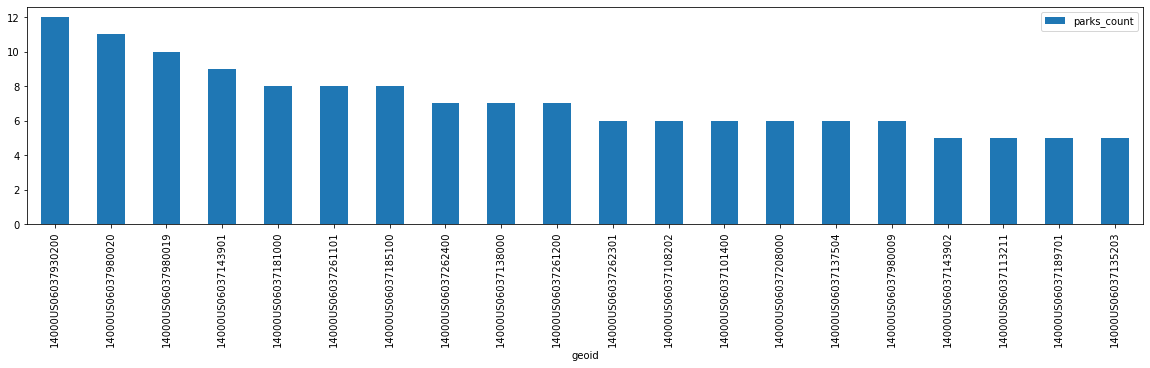

In [54]:
parks_by_ct[:20].plot.bar(figsize=(20,4),
                          x= 'geoid',
                          y='parks_count')

In [55]:
join=join.merge(parks_by_ct, on ='geoid')

In [56]:
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   geoid                        1365 non-null   object  
 1   name                         1365 non-null   object  
 2   B25003001                    1365 non-null   float64 
 3   B25003002                    1365 non-null   float64 
 4   B25003003                    1365 non-null   float64 
 5   geometry                     1365 non-null   geometry
 6   Geo_FIPS                     1365 non-null   object  
 7   Geo_NAME                     1365 non-null   object  
 8   Geo_QName                    1365 non-null   object  
 9   Geo_STUSAB                   1365 non-null   object  
 10  Geo_TRACT                    1365 non-null   object  
 11  2019_Occupied Housing Units  1365 non-null   object  
 12  2019_Owners                  1365 non-null   object  


In [57]:
join.sample()

,geoid,name,B25003001,B25003002,B25003003,geometry,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,SUM_AMERIN,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,parks_count
1097,14000US06037262400,"Census Tract 2624, Los Angeles, CA",1101.0,989.0,112.0,"MULTIPOLYGON (((-13193748.019 4044608.760, -13...",6037262400,Census Tract 2624,"Census Tract 2624, Los Angeles County, California",ca,...,0.0,44.0,0.0,1.0,30.0,48.0,@5z4-zvg-fmk,6171.568383,760296.432122,7


In [60]:
join['parks_per_1000'] = join['parks_count']/join['2019_Occupied Housing Units']*1000

In [59]:
join['parks_count'] = join['parks_count'].astype(float)
join['2019_Occupied Housing Units'] = join['2019_Occupied Housing Units'].astype(float)

In [63]:
join.sort_values(by="parks_per_1000").tail(50)

,geoid,name,B25003001,B25003002,B25003003,geometry,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,parks_count,parks_per_1000
751,14000US06037207400,"Census Tract 2074, Los Angeles, CA",374.0,0.0,374.0,"MULTIPOLYGON (((-13163883.226 4036698.552, -13...",6037207400,Census Tract 2074,"Census Tract 2074, Los Angeles County, California",ca,...,4123.0,10.0,17.0,293.0,2345.0,@5z5-3rs-5mk,332.799145,6.907757e+03,3.0,8.021390
1323,14000US06037980015,"Census Tract 9800.15, Los Angeles, CA",350.0,0.0,350.0,"MULTIPOLYGON (((-13170262.055 3997538.878, -13...",6037980015,Census Tract 9800.15,"Census Tract 9800.15, Los Angeles County, Cali...",ca,...,299.0,14.0,4.0,85.0,919.0,@5z6-3dp-nbk,433.692499,1.058425e+04,3.0,8.571429
1322,14000US06037980015,"Census Tract 9800.15, Los Angeles, CA",350.0,0.0,350.0,"MULTIPOLYGON (((-13170262.055 3997538.878, -13...",6037980015,Census Tract 9800.15,"Census Tract 9800.15, Los Angeles County, Cali...",ca,...,83.0,9.0,0.0,18.0,279.0,@5z6-3dp-pd9,1139.547882,4.918928e+04,3.0,8.571429
1324,14000US06037980015,"Census Tract 9800.15, Los Angeles, CA",350.0,0.0,350.0,"MULTIPOLYGON (((-13170262.055 3997538.878, -13...",6037980015,Census Tract 9800.15,"Census Tract 9800.15, Los Angeles County, Cali...",ca,...,1396.0,116.0,13.0,267.0,8962.0,@5z6-3bh-tsq,7858.795266,1.176968e+06,3.0,8.571429
402,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,42.0,0.0,0.0,26.0,31.0,@5z4-z5p-swk,1813.771041,1.626615e+05,6.0,8.583691
401,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,40.0,0.0,0.0,33.0,42.0,@5z4-z5m-8jv,793.736427,2.307705e+04,6.0,8.583691
403,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,30.0,0.0,0.0,23.0,24.0,@5z4-z5p-vfz,2165.025310,1.639388e+05,6.0,8.583691
398,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,417.0,3.0,6.0,252.0,323.0,@5z4-z5f-dn5,122531.934922,4.628907e+07,6.0,8.583691
399,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,60.0,0.0,0.0,41.0,42.0,@5z4-z5w-tvz,3454.316526,1.167337e+05,6.0,8.583691
400,14000US06037137504,"Census Tract 1375.04, Los Angeles, CA",699.0,662.0,37.0,"MULTIPOLYGON (((-13200397.243 4048043.305, -13...",6037137504,Census Tract 1375.04,"Census Tract 1375.04, Los Angeles County, Cali...",ca,...,301.0,0.0,2.0,230.0,261.0,@5z4-z5w-5pv,24485.159995,3.545620e+06,6.0,8.583691


Now that I have all the variables I need, I can begin creating my matrix!

In [62]:
join = join[join['2019_Occupied Housing Units']!=0]

I forgot that I had to delete 2019 Occupied Housing Units that equal zero because that gives an error message when you divide by zero.

In [64]:
join['parks_per_1000'].describe()

count    1338.000000
mean        6.592879
std        43.046701
min         0.176585
25%         0.709849
50%         1.013175
75%         1.957909
max       750.000000
Name: parks_per_1000, dtype: float64

So the Quantiles go for Parks per 1000 people (or occupied housing units; may have to ask Sim to make this metric since I'm using housing units rather than total population)


1 = 0-0.709849

2 = 0.709849-1.013175

3 = 1.013175-1.957909

4 = >1.957909


In [65]:
join['PC_Renters'].describe()

count    1338.000000
mean       20.570452
std        65.948324
min       -74.074074
25%        -4.372782
50%         7.314011
75%        24.924925
max      1025.000000
Name: PC_Renters, dtype: float64

For percent change in renters, the quantiles will go:

1 =  -74.074074 - -4.372782

2 = -4.372782 - 7.314011

3 = 7.314011- 24.924925

4 =  >24.924925

Time to make conditions and then map it!

In [66]:
conditions = [
    (join['parks_per_1000'] < 0.709849), # lowest parks
    (join['parks_per_1000'] < 1.013175) & (join['parks_per_1000'] >= 0.709849),   #second lowest
    (join['parks_per_1000'] <1.957909) & (join['parks_per_1000'] >= 1.013175), #second highest
    (join['parks_per_1000'] >= 1.957909)    # highest parks
    ]


# create a list of the values we want to assign for each condition
values = [
    1, 
    2, 
    3, 
    4
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
join['park_index'] = np.select(conditions, values)

In [67]:
join.sample(10)

,geoid,name,B25003001,B25003002,B25003003,geometry,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,parks_count,parks_per_1000,park_index
1113,14000US06037262704,"Census Tract 2627.04, Los Angeles, CA",1609.0,995.0,614.0,"MULTIPOLYGON (((-13197635.963 4033903.356, -13...",6037262704,Census Tract 2627.04,"Census Tract 2627.04, Los Angeles County, Cali...",ca,...,0.0,1.0,31.0,64.0,@5z4-z76-ht9,902.035054,5.810723e+03,3.0,1.864512,3
259,14000US06037124102,"Census Tract 1241.02, Los Angeles, CA",1362.0,287.0,1075.0,"MULTIPOLYGON (((-13178866.718 4052917.787, -13...",6037124102,Census Tract 1241.02,"Census Tract 1241.02, Los Angeles County, Cali...",ca,...,10.0,42.0,203.0,6145.0,@5z4-zd8-4sq,404.614492,6.327025e+03,1.0,0.734214,2
140,14000US06037113211,"Census Tract 1132.11, Los Angeles, CA",1678.0,1382.0,296.0,"MULTIPOLYGON (((-13206216.470 4065049.916, -13...",6037113211,Census Tract 1132.11,"Census Tract 1132.11, Los Angeles County, Cali...",ca,...,2.0,1.0,38.0,167.0,@5z4-zgq-6x5,1690.725584,9.772547e+04,5.0,2.979738,4
80,14000US06037106603,"Census Tract 1066.03, Los Angeles, CA",990.0,867.0,123.0,"MULTIPOLYGON (((-13196678.393 4072780.550, -13...",6037106603,Census Tract 1066.03,"Census Tract 1066.03, Los Angeles County, Cali...",ca,...,0.0,5.0,54.0,194.0,@5z4-vrw-v2k,7857.845775,2.815728e+06,4.0,4.040404,4
1143,14000US06037267402,"Census Tract 2674.02, Los Angeles, CA",2707.0,479.0,2228.0,"MULTIPOLYGON (((-13188118.926 4034353.524, -13...",6037267402,Census Tract 2674.02,"Census Tract 2674.02, Los Angeles County, Cali...",ca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.369413,1
938,14000US06037228320,"Census Tract 2283.20, Los Angeles, CA",709.0,200.0,509.0,"MULTIPOLYGON (((-13165788.681 4029806.452, -13...",6037228320,Census Tract 2283.20,"Census Tract 2283.20, Los Angeles County, Cali...",ca,...,1.0,61.0,92.0,22386.0,@5z6-3qz-gx5,1035.585424,5.916693e+04,1.0,1.410437,3
1214,14000US06037275500,"Census Tract 2755, Los Angeles, CA",1907.0,494.0,1413.0,"MULTIPOLYGON (((-13182552.061 4027591.059, -13...",6037275500,Census Tract 2755,"Census Tract 2755, Los Angeles County, California",ca,...,30.0,17.0,94.0,4796.0,@5z4-zv4-99f,662.894878,1.948647e+04,1.0,0.524384,1
171,14000US06037117101,"Census Tract 1171.01, Los Angeles, CA",1465.0,1012.0,453.0,"MULTIPOLYGON (((-13187736.877 4060959.949, -13...",6037117101,Census Tract 1171.01,"Census Tract 1171.01, Los Angeles County, Cali...",ca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.682594,1
888,14000US06037219901,"Census Tract 2199.01, Los Angeles, CA",1430.0,367.0,1063.0,"MULTIPOLYGON (((-13176268.187 4032549.602, -13...",6037219901,Census Tract 2199.01,"Census Tract 2199.01, Los Angeles County, Cali...",ca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.699301,1
1049,14000US06037241002,"Census Tract 2410.02, Los Angeles, CA",1039.0,446.0,593.0,"MULTIPOLYGON (((-13165706.082 4018564.079, -13...",6037241002,Census Tract 2410.02,"Census Tract 2410.02, Los Angeles County, Cali...",ca,...,3.0,21.0,69.0,3348.0,@5z6-3pw-hwk,3913.400384,4.180651e+05,1.0,0.962464,2


Park_index Variable is successful! Now, lets do the Percent Change in Renter Index

In [68]:
conditions1 = [
    (join['PC_Renters'] < -4.372782), # lowest increase (highest decrease) in percent change in renters
    (join['PC_Renters'] < 7.314011) & (join['PC_Renters'] >= -4.372782),   
    (join['PC_Renters'] < 24.924925) & (join['PC_Renters'] >= 7.314011), 
    (join['PC_Renters'] >= 24.924925)    # highest increase in percent change in renters
    ]


# create a list of the values we want to assign for each condition
values1 = [
    1, 
    2, 
    3, 
    4
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
join['renter_index'] = np.select(conditions1, values1)

In [69]:
join.sample(10)

,geoid,name,B25003001,B25003002,B25003003,geometry,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,parks_count,parks_per_1000,park_index,renter_index
764,14000US06037208301,"Census Tract 2083.01, Los Angeles, CA",556.0,0.0,556.0,"MULTIPOLYGON (((-13165492.238 4037041.198, -13...",6037208301,Census Tract 2083.01,"Census Tract 2083.01, Los Angeles County, Cali...",ca,...,23.0,166.0,15163.0,@5z5-3qr-rkz,148.144636,1.310963e+03,1.0,1.798561,3,3
366,14000US06037134520,"Census Tract 1345.20, Los Angeles, CA",1879.0,288.0,1591.0,"MULTIPOLYGON (((-13203142.827 4055825.337, -13...",6037134520,Census Tract 1345.20,"Census Tract 1345.20, Los Angeles County, Cali...",ca,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.532198,1,3
705,14000US06037201602,"Census Tract 2016.02, Los Angeles, CA",828.0,465.0,363.0,"MULTIPOLYGON (((-13155419.160 4039190.557, -13...",6037201602,Census Tract 2016.02,"Census Tract 2016.02, Los Angeles County, Cali...",ca,...,3.0,17.0,3054.0,@5z5-3jz-swk,305.617454,5.123946e+03,1.0,1.207729,3,1
891,14000US06037220000,"Census Tract 2200, Los Angeles, CA",1982.0,660.0,1322.0,"MULTIPOLYGON (((-13174220.354 4032505.948, -13...",6037220000,Census Tract 2200,"Census Tract 2200, Los Angeles County, California",ca,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.504541,1,3
524,14000US06037185100,"Census Tract 1851, Los Angeles, CA",2233.0,1367.0,866.0,"MULTIPOLYGON (((-13160410.503 4043383.339, -13...",6037185100,Census Tract 1851,"Census Tract 1851, Los Angeles County, California",ca,...,2.0,59.0,842.0,@5z5-3q3-6p9,611.745228,1.818157e+04,8.0,3.582624,4,3
174,14000US06037117202,"Census Tract 1172.02, Los Angeles, CA",814.0,648.0,166.0,"MULTIPOLYGON (((-13189692.872 4060979.205, -13...",6037117202,Census Tract 1172.02,"Census Tract 1172.02, Los Angeles County, Cali...",ca,...,13.0,157.0,2895.0,@5z4-zcq-5j9,1162.032757,3.566642e+04,1.0,1.228501,3,4
1112,14000US06037262604,"Census Tract 2626.04, Los Angeles, CA",2417.0,1978.0,439.0,"MULTIPOLYGON (((-13199170.391 4035749.949, -13...",6037262604,Census Tract 2626.04,"Census Tract 2626.04, Los Angeles County, Cali...",ca,...,6.0,252.0,323.0,@5z4-z5f-dn5,122531.934922,4.628907e+07,3.0,1.241208,3,4
1205,14000US06037274100,"Census Tract 2741, Los Angeles, CA",2326.0,829.0,1497.0,"MULTIPOLYGON (((-13186760.828 4027184.792, -13...",6037274100,Census Tract 2741,"Census Tract 2741, Los Angeles County, California",ca,...,6.0,167.0,630.0,@5z4-zwn-87q,86.244213,3.680998e+02,1.0,0.429923,1,4
1078,14000US06037261102,"Census Tract 2611.02, Los Angeles, CA",1467.0,1377.0,90.0,"MULTIPOLYGON (((-13184523.640 4045790.877, -13...",6037261102,Census Tract 2611.02,"Census Tract 2611.02, Los Angeles County, Cali...",ca,...,2.0,46.0,80.0,@5z4-zfy-kfz,19062.934851,2.456222e+06,2.0,1.363327,3,1
368,14000US06037134522,"Census Tract 1345.22, Los Angeles, CA",1399.0,269.0,1130.0,"MULTIPOLYGON (((-13203145.165 4056803.346, -13...",6037134522,Census Tract 1345.22,"Census Tract 1345.22, Los Angeles County, Cali...",ca,...,17.0,175.0,5970.0,@5z4-zjc-389,231.247898,3.135586e+03,1.0,0.714796,2,3


Now, let us just create some side-by-side maps and perhaps a map with two layers!

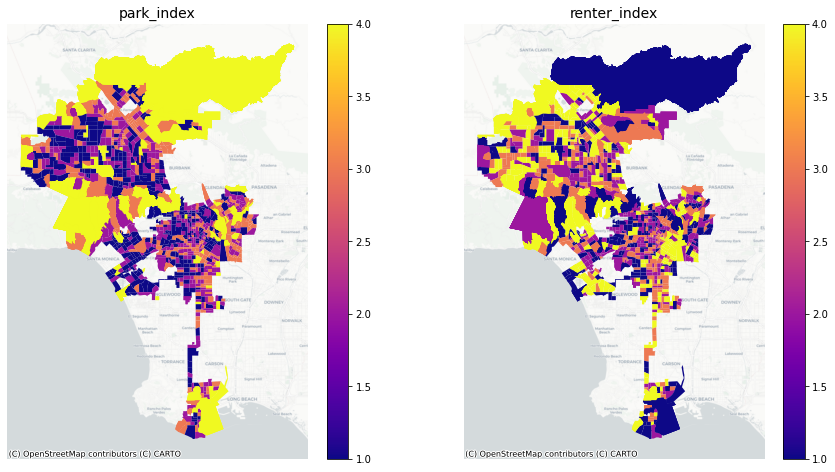

In [70]:
column1 = 'park_index'
column2 = 'renter_index'
fig,ax = plt.subplots(1,2,figsize=(15,8))

join.plot(ax=ax[0],
         column=column1,
         legend=True, 
         cmap='plasma'
        )

ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

join.plot(ax=ax[1],
         column=column2,
         legend=True,
         cmap='plasma'
        )
ctx.add_basemap(ax[0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1],source=ctx.providers.CartoDB.Positron)
ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');


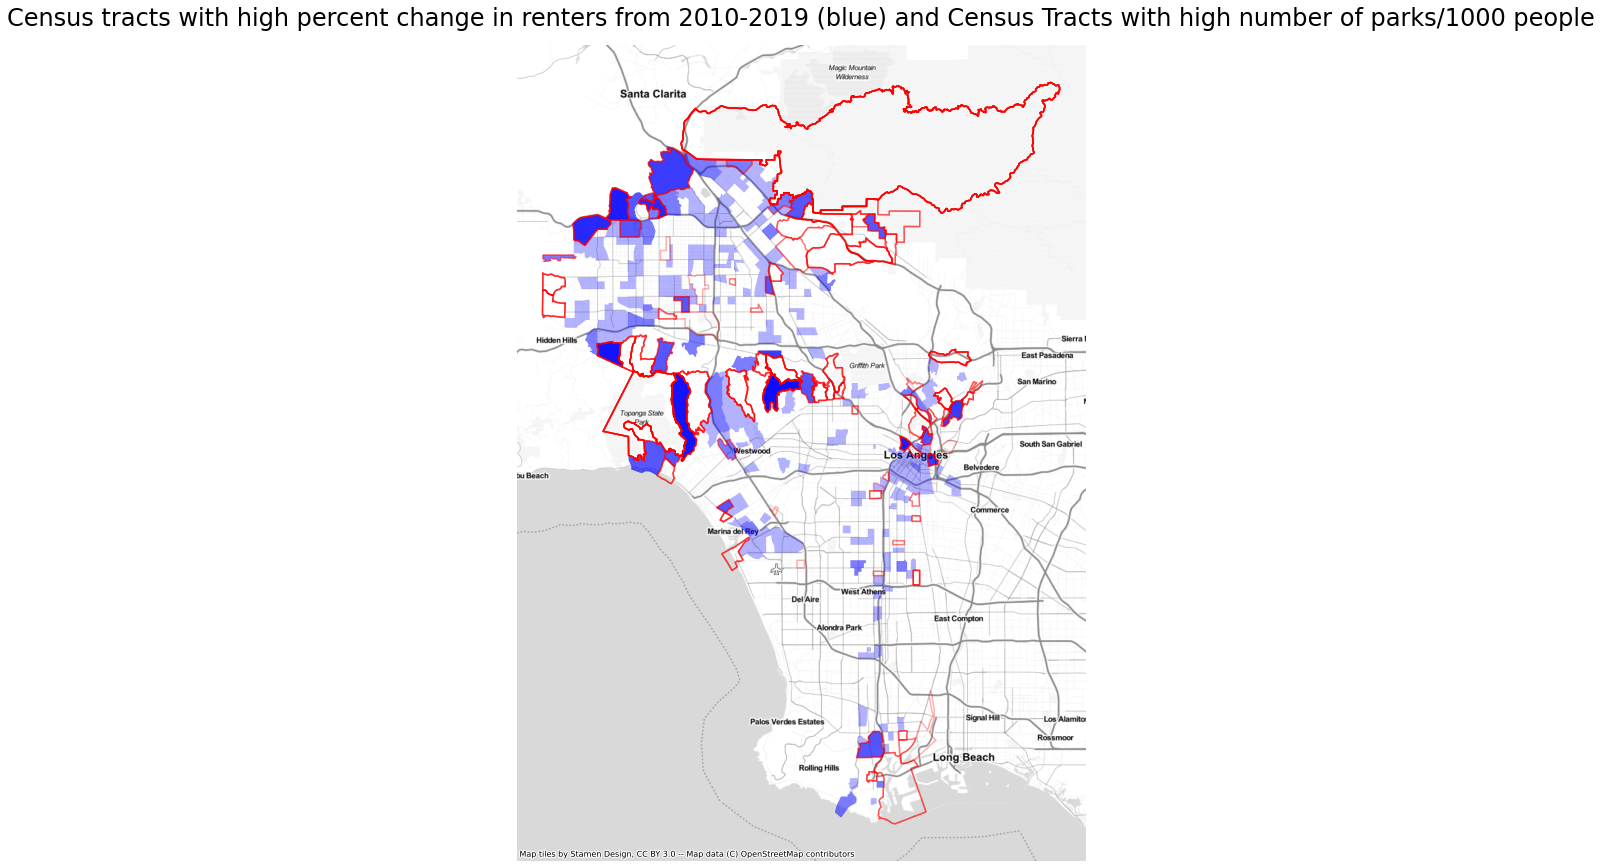

In [75]:
join_web_mercator = join.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 


join_web_mercator[join_web_mercator['renter_index'] == 4].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.3
)

join_web_mercator[join_web_mercator['park_index'] == 4].boundary.plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.3
)

 
# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census tracts with high negative percent change in renters from 2010-2019 (blue) and Census Tracts with high number of parks/1000 people',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

I think it would be interesting to look at the displacement index eventually to see which census tracts have high parks but high increases in housing prices and high decreases in renters. 

Something else that could be interesting, is doing spatial autocorrelation for the index to see which areas have clusters of HH, HL, and LL park and renter index. 